In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"]=(df["class"]=="g").astype(int)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

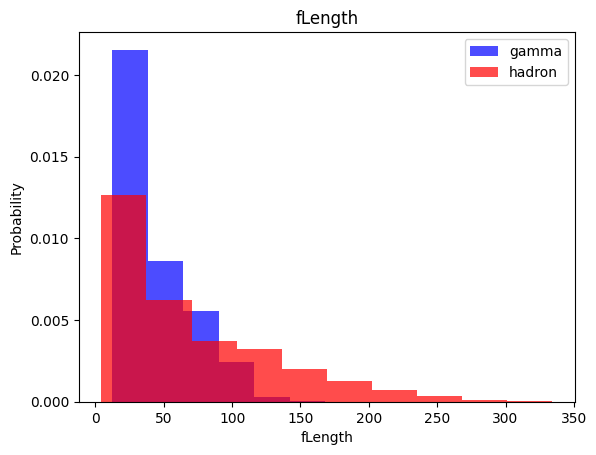

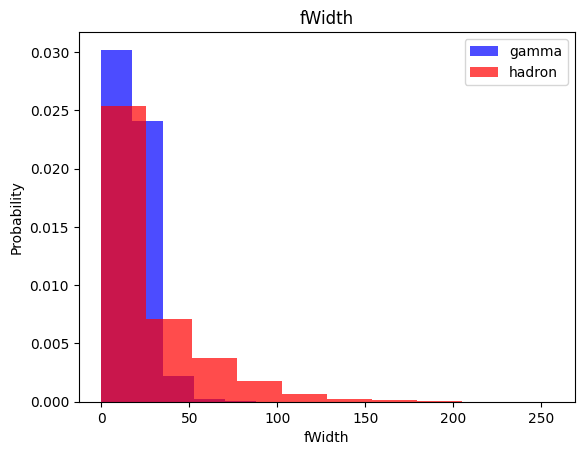

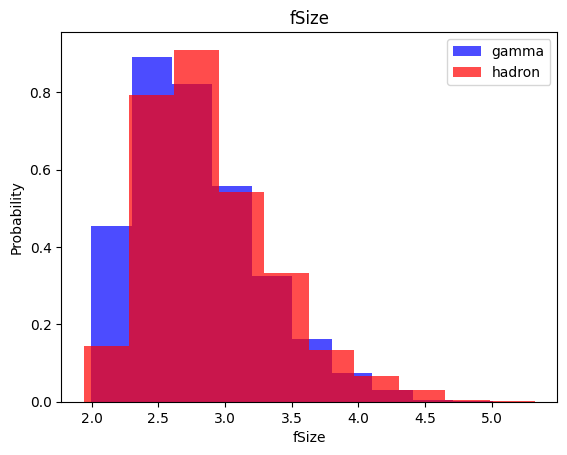

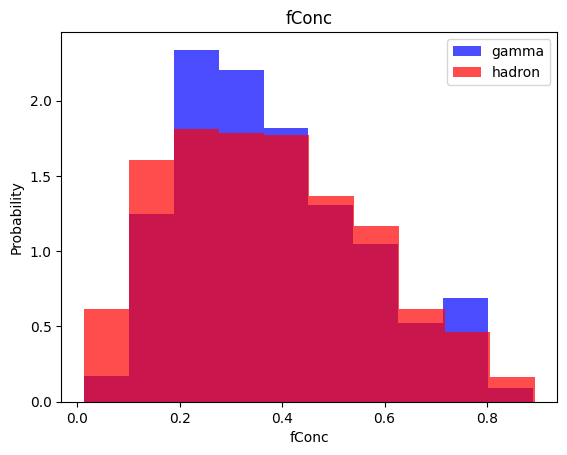

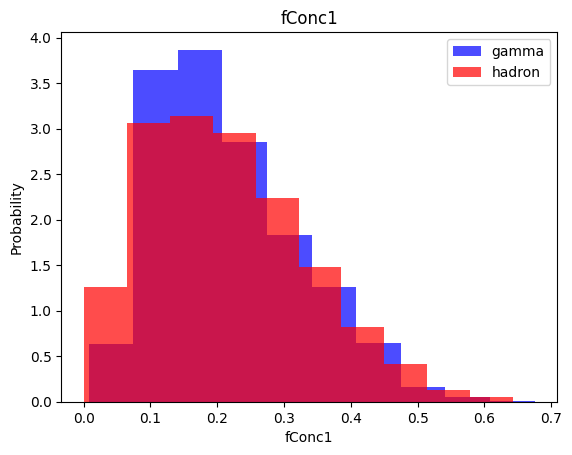

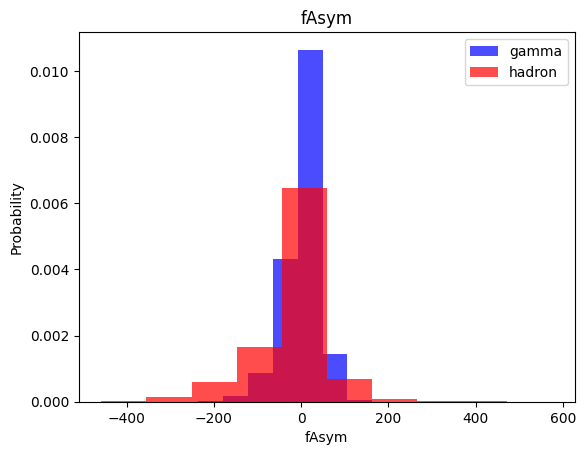

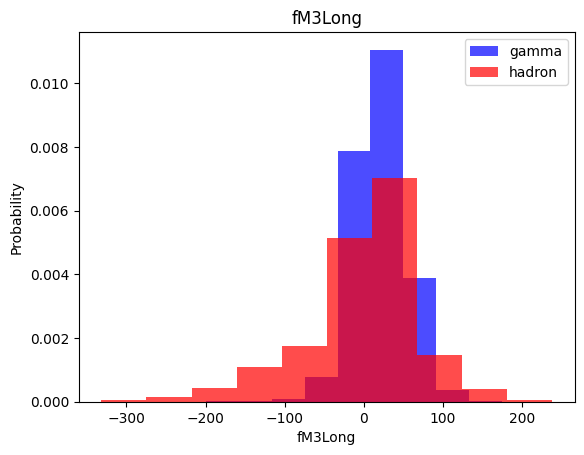

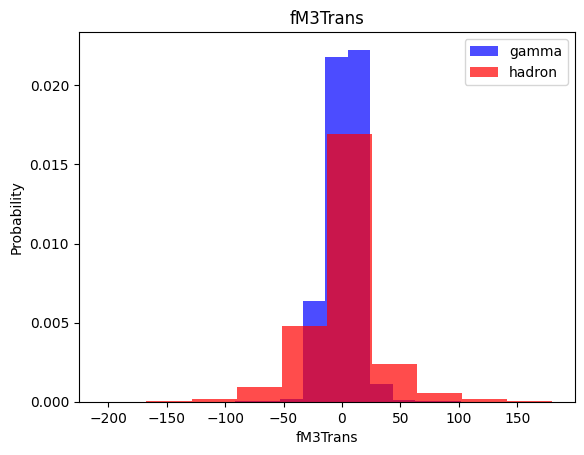

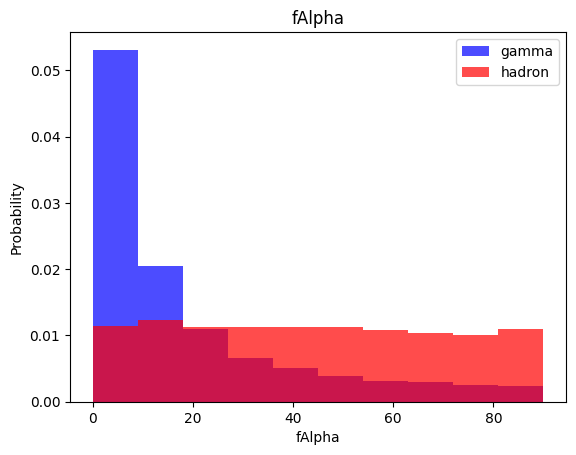

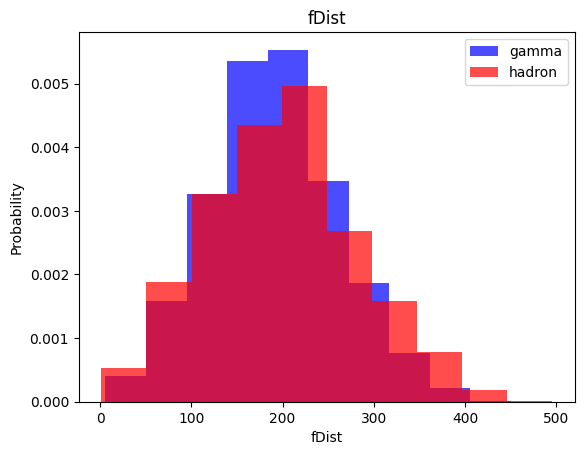

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color="blue",label="gamma",alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color="red",label="hadron",alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train,validation,test datasets


In [ ]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe,oversample=False):
  X=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scalar=StandardScaler()
  X=scalar.fit_transform(X)

  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)

  data=np.hstack((X,np.reshape(y,(-1,1))))

  return data,X,y

In [ ]:
train,X_train,y_train=scale_dataset(train,oversample=True)
valid,X_valid,y_valid=scale_dataset(valid,oversample=False)
test,X_test,y_test=scale_dataset(test,oversample=False)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn_model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
y_test

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1344
           1       0.85      0.87      0.86      2460

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model=GaussianNB()
nb_model=nb_model.fit(X_train,y_train)

In [ ]:
y_pred=nb_model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.39      0.50      1344
           1       0.73      0.90      0.81      2460

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.72      0.72      0.70      3804



Log Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model=LogisticRegression()
log_model=log_model.fit(X_train,y_train)

In [ ]:
y_pred=log_model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1344
           1       0.85      0.83      0.84      2460

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



Support Vector MAchines

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model=SVC()
svm_model=svm_model.fit(X_train,y_train)

In [ ]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1344
           1       0.89      0.90      0.89      2460

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



NN model

In [ ]:
import tensorflow as tf

In [ ]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
  nn_model=tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',
                 metrics=['accuracy'])
  history=nn_model.fit(
    X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0
  )

  return nn_model,history

In [ ]:
def plot_history(history):
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  plt.legend()
  ax2.grid(True)

  plt.show()




16nodes ,dropout0,lr0.01,batch_size32


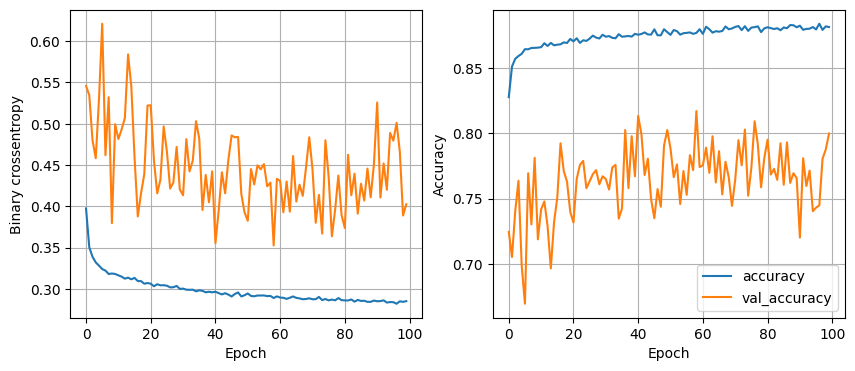

119/119 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8728
16nodes ,dropout0,lr0.01,batch_size64


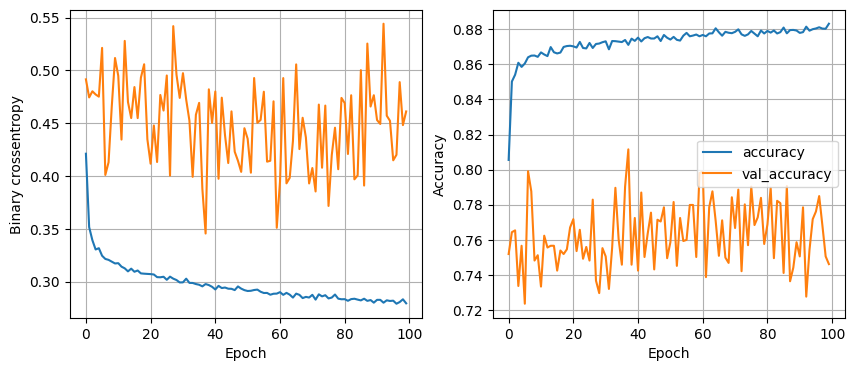

119/119 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.8651
16nodes ,dropout0,lr0.01,batch_size128


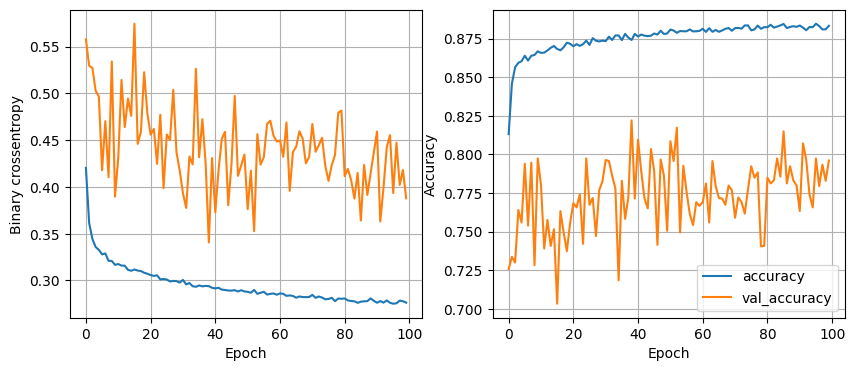

119/119 [==============================] - 0s 2ms/step - loss: 0.3217 - accuracy: 0.8699
16nodes ,dropout0,lr0.005,batch_size32


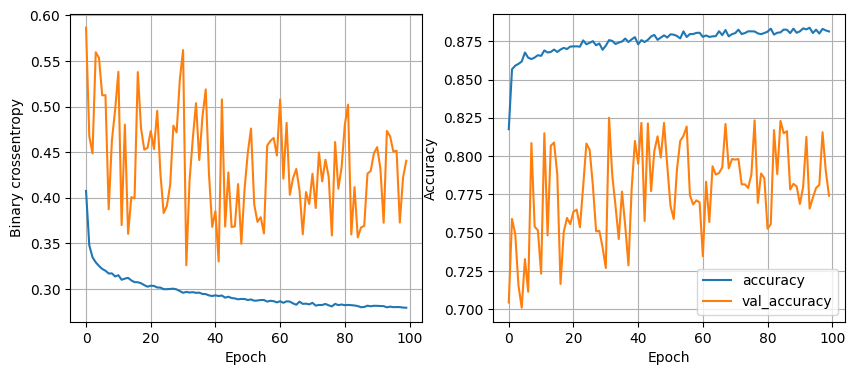

119/119 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8686
16nodes ,dropout0,lr0.005,batch_size64


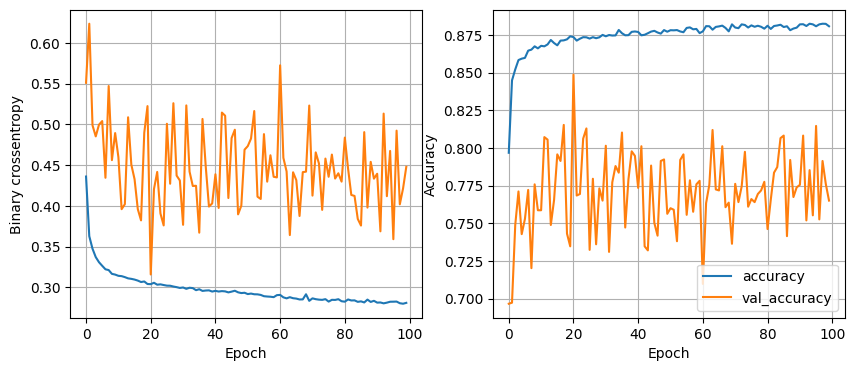

119/119 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8751
16nodes ,dropout0,lr0.005,batch_size128


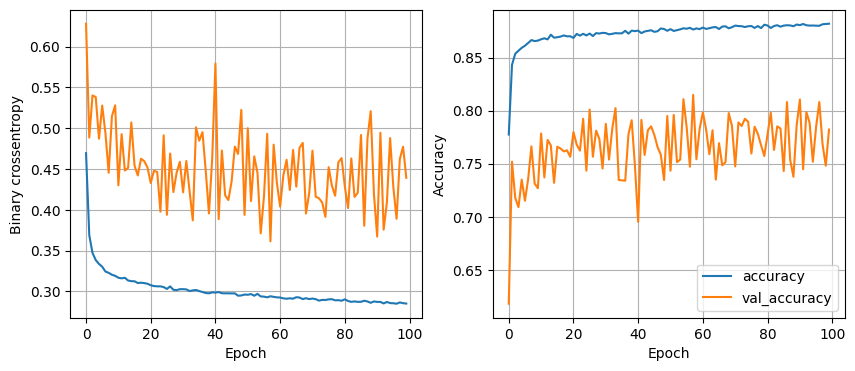

119/119 [==============================] - 0s 2ms/step - loss: 0.3056 - accuracy: 0.8725
16nodes ,dropout0,lr0.001,batch_size32


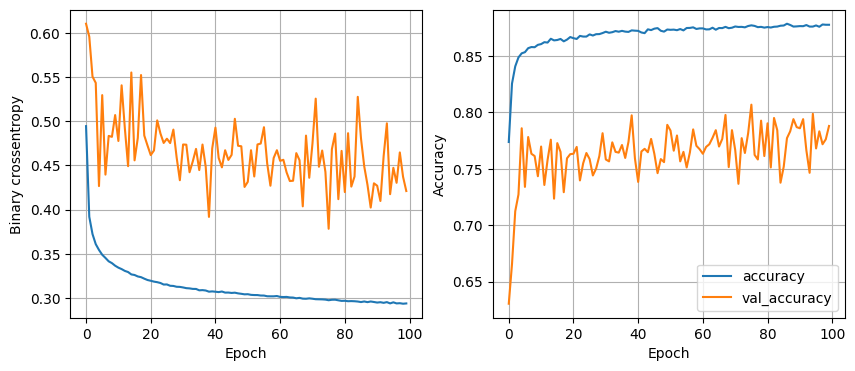

119/119 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8686
16nodes ,dropout0,lr0.001,batch_size64


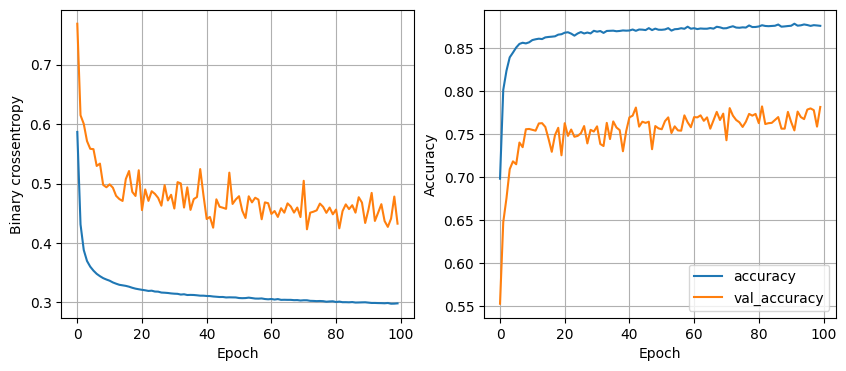

119/119 [==============================] - 0s 2ms/step - loss: 0.3030 - accuracy: 0.8728
16nodes ,dropout0,lr0.001,batch_size128


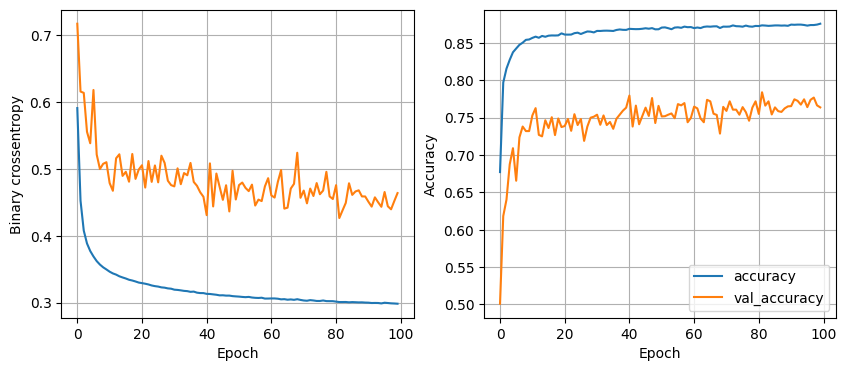

119/119 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8725
16nodes ,dropout0.2,lr0.01,batch_size32


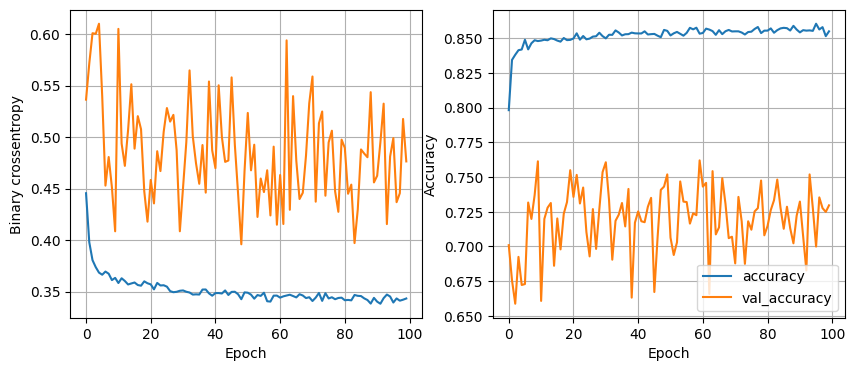

119/119 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.8717
16nodes ,dropout0.2,lr0.01,batch_size64


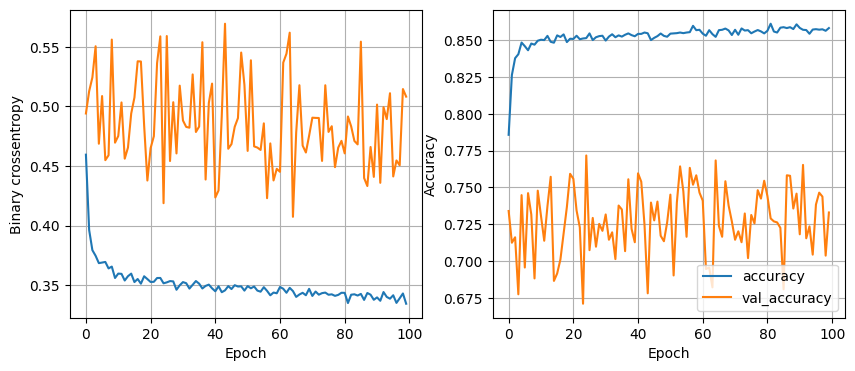

119/119 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.8699
16nodes ,dropout0.2,lr0.01,batch_size128


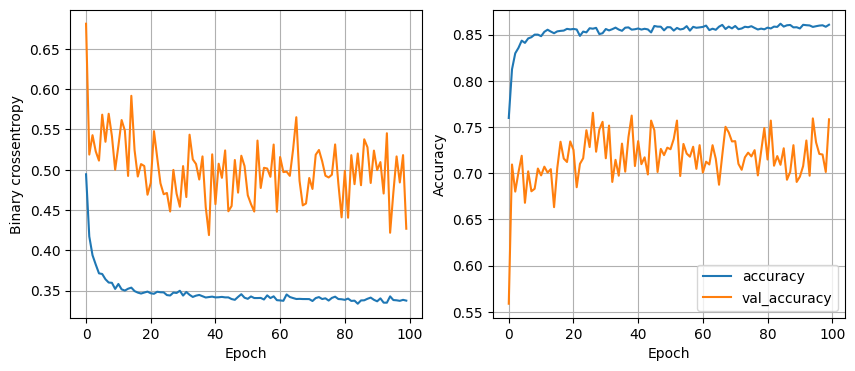

119/119 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8701
16nodes ,dropout0.2,lr0.005,batch_size32


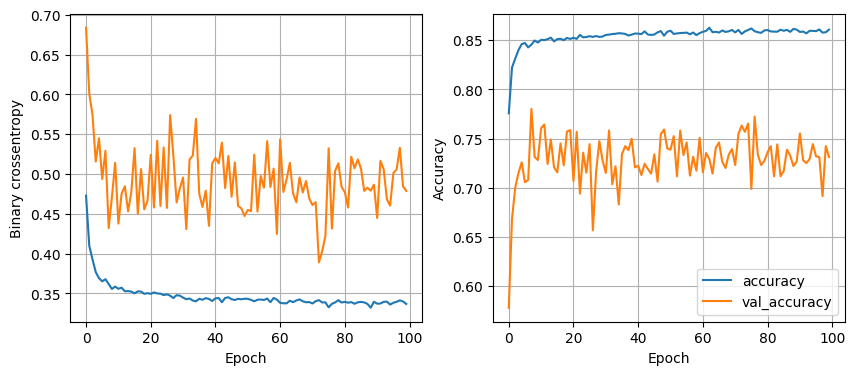

119/119 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8657
16nodes ,dropout0.2,lr0.005,batch_size64


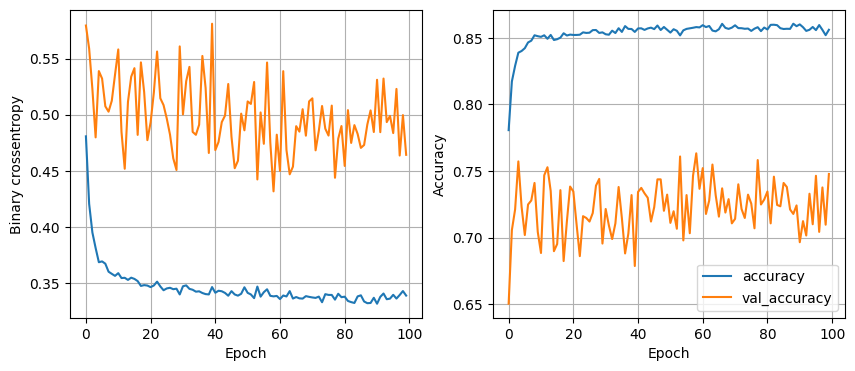

119/119 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8715
16nodes ,dropout0.2,lr0.005,batch_size128


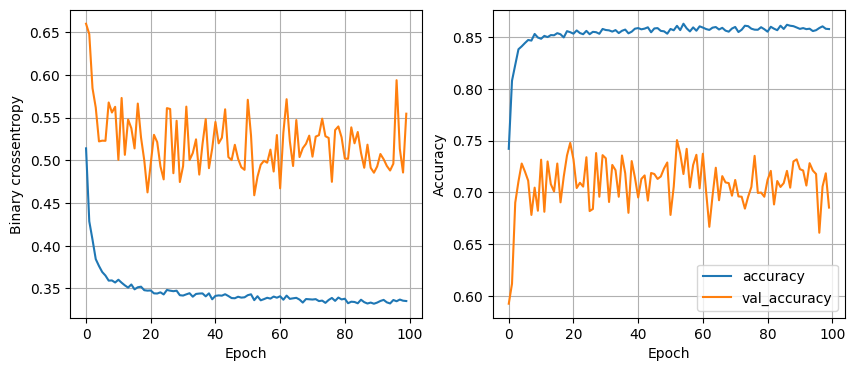

119/119 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8720
16nodes ,dropout0.2,lr0.001,batch_size32


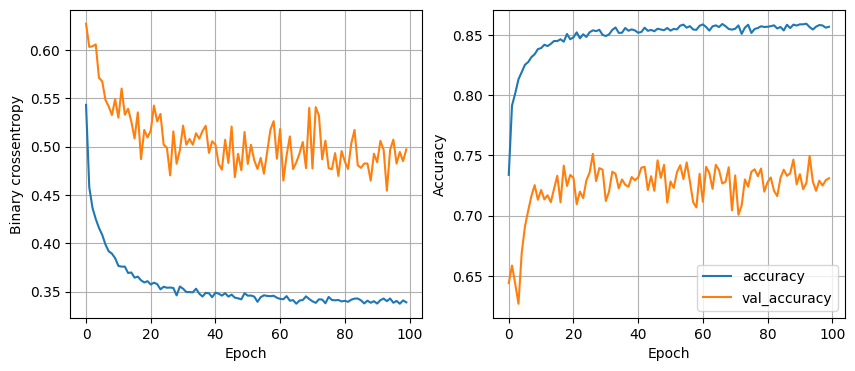

119/119 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8715
16nodes ,dropout0.2,lr0.001,batch_size64


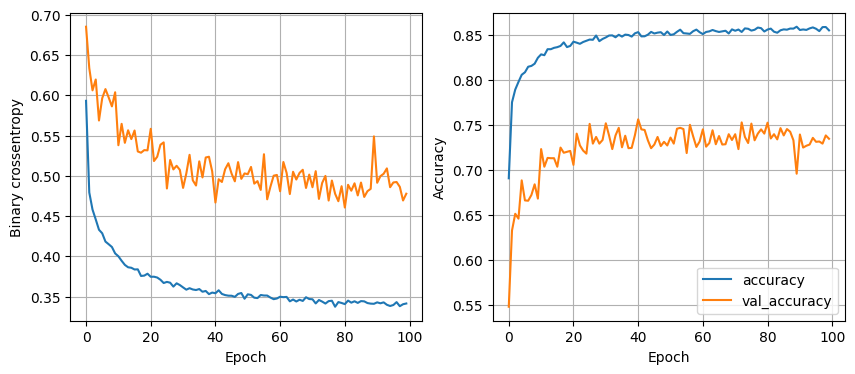

119/119 [==============================] - 0s 3ms/step - loss: 0.3132 - accuracy: 0.8696
16nodes ,dropout0.2,lr0.001,batch_size128


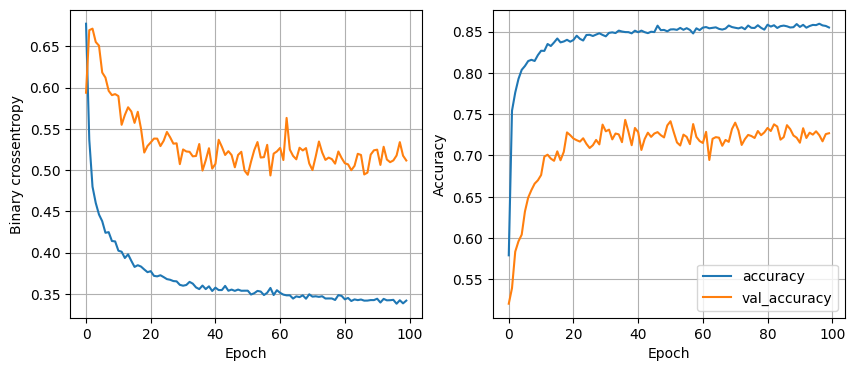

119/119 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8696
32nodes ,dropout0,lr0.01,batch_size32


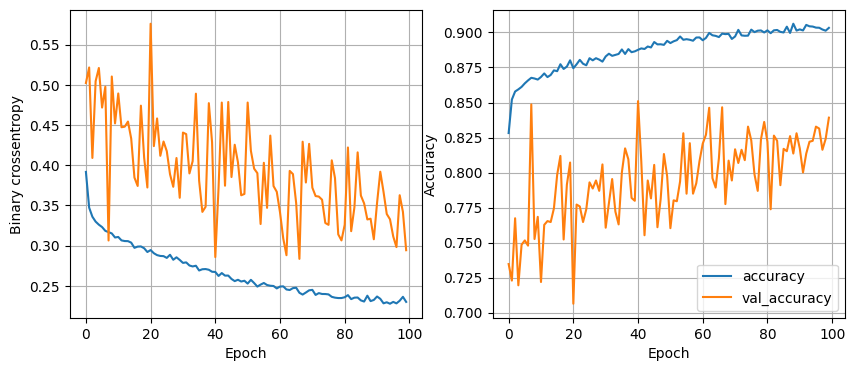

119/119 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8628
32nodes ,dropout0,lr0.01,batch_size64


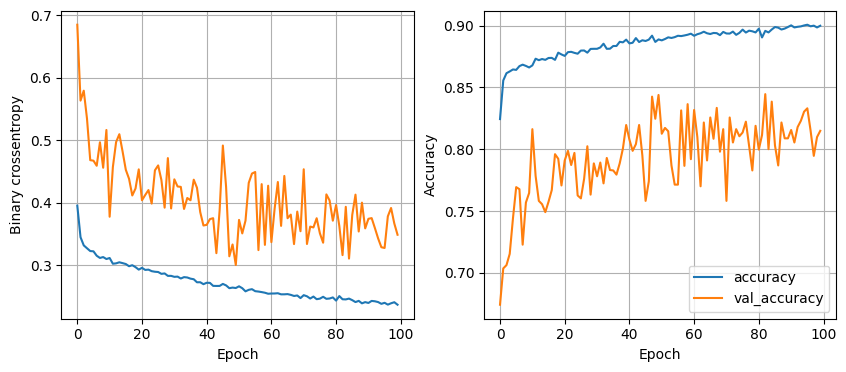

119/119 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8583
32nodes ,dropout0,lr0.01,batch_size128


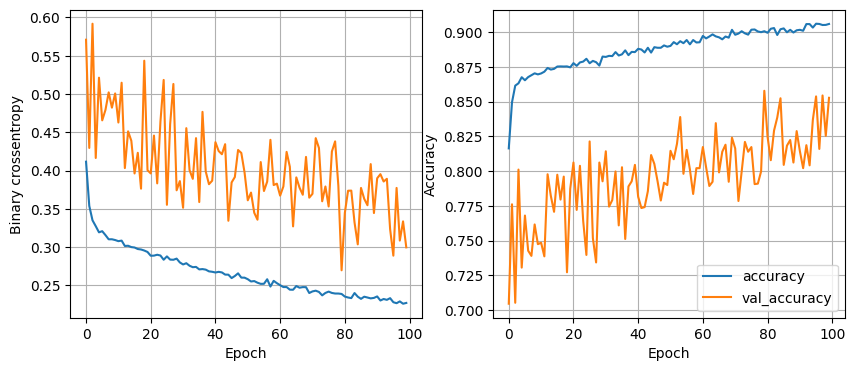

119/119 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8578
32nodes ,dropout0,lr0.005,batch_size32


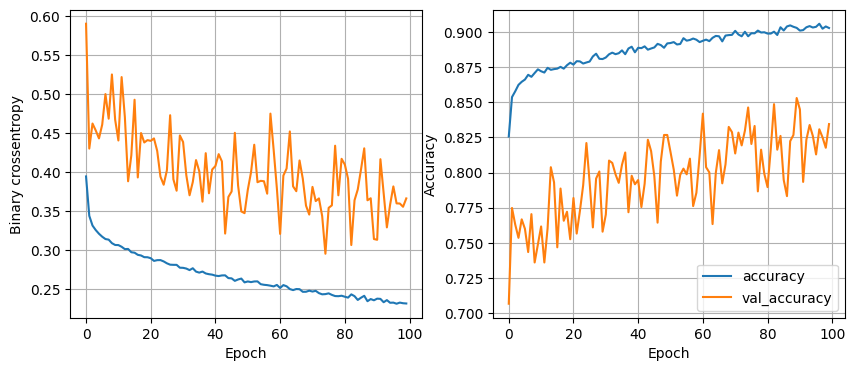

119/119 [==============================] - 0s 2ms/step - loss: 0.3634 - accuracy: 0.8612
32nodes ,dropout0,lr0.005,batch_size64


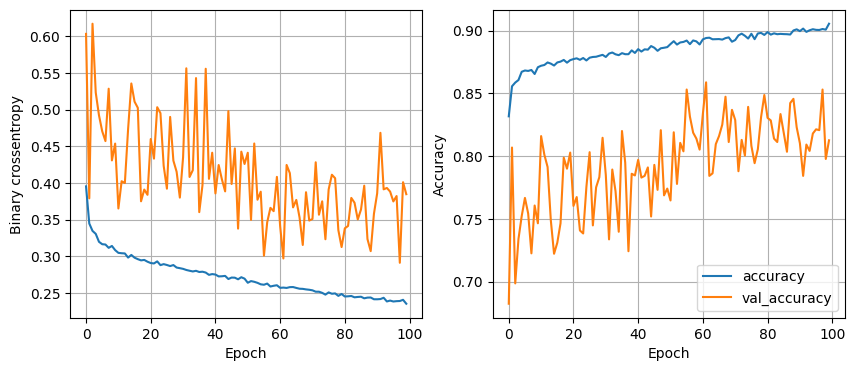

119/119 [==============================] - 0s 2ms/step - loss: 0.3556 - accuracy: 0.8646
32nodes ,dropout0,lr0.005,batch_size128


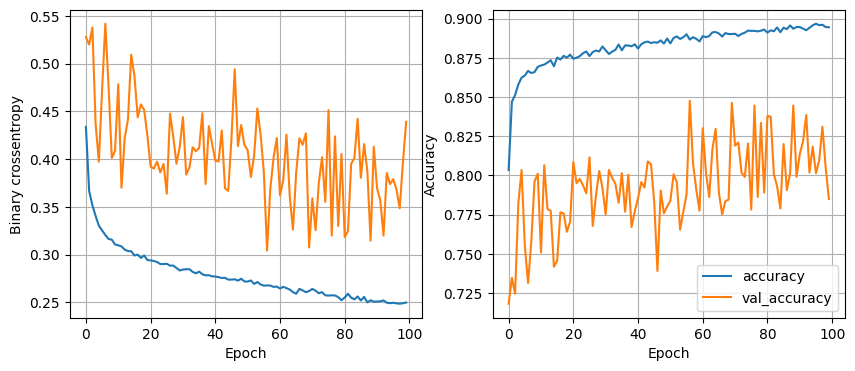

119/119 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.8612
32nodes ,dropout0,lr0.001,batch_size32


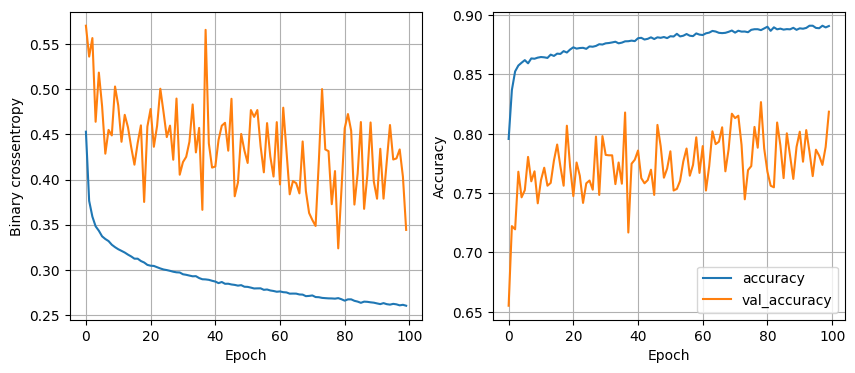

119/119 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8704
32nodes ,dropout0,lr0.001,batch_size64


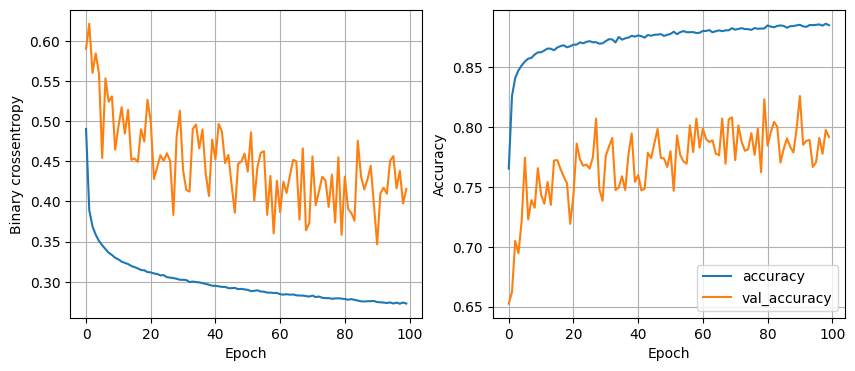

119/119 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8712
32nodes ,dropout0,lr0.001,batch_size128


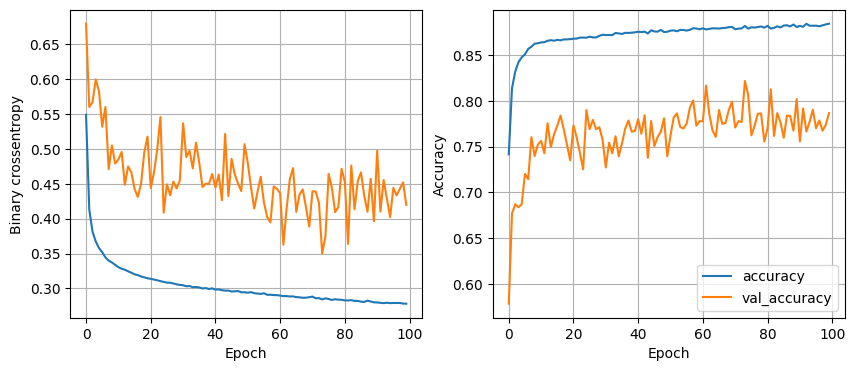

119/119 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8704
32nodes ,dropout0.2,lr0.01,batch_size32


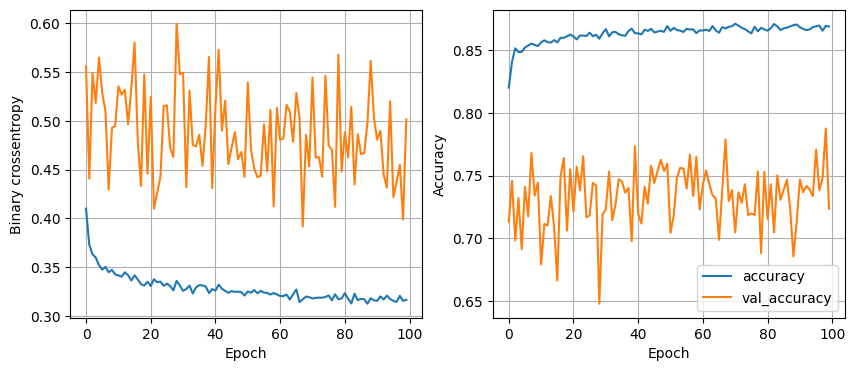

119/119 [==============================] - 0s 2ms/step - loss: 0.3047 - accuracy: 0.8746
32nodes ,dropout0.2,lr0.01,batch_size64


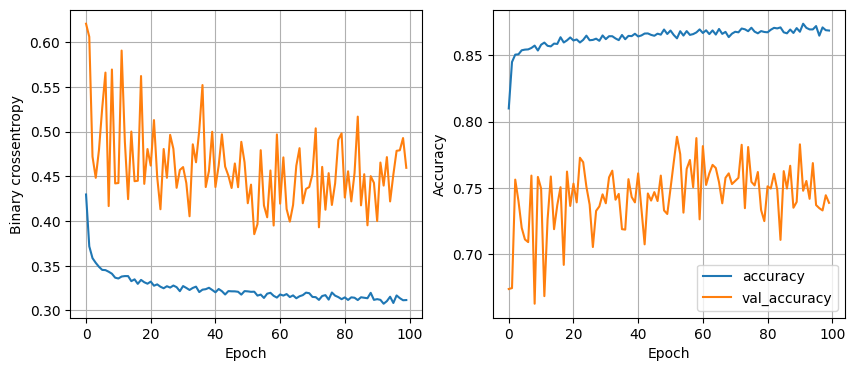

119/119 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.8746
32nodes ,dropout0.2,lr0.01,batch_size128


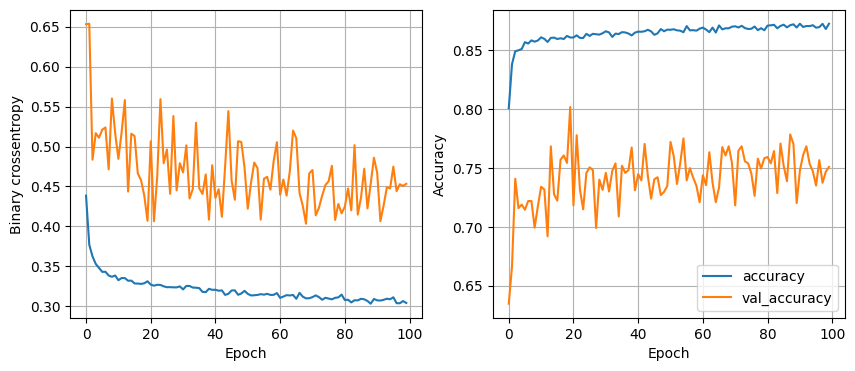

119/119 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8749
32nodes ,dropout0.2,lr0.005,batch_size32


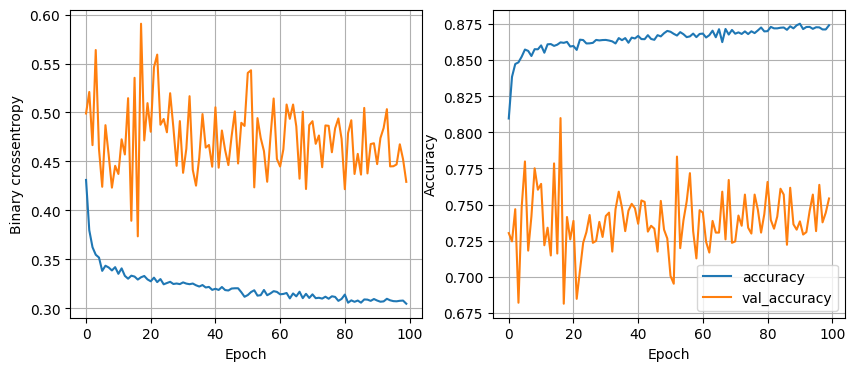

119/119 [==============================] - 0s 2ms/step - loss: 0.3041 - accuracy: 0.8783
32nodes ,dropout0.2,lr0.005,batch_size64


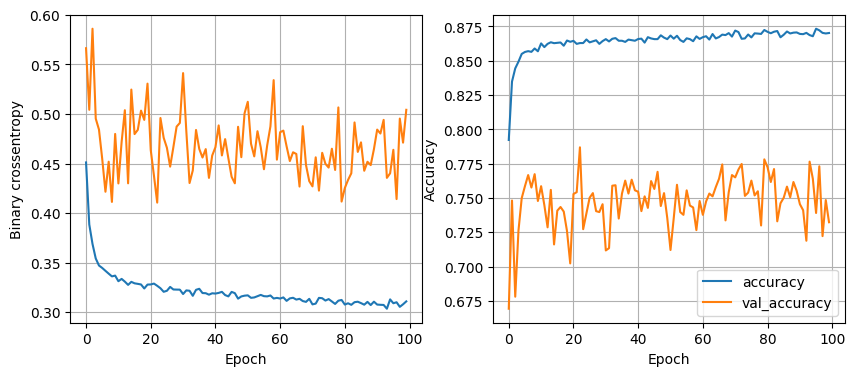

119/119 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8775
32nodes ,dropout0.2,lr0.005,batch_size128


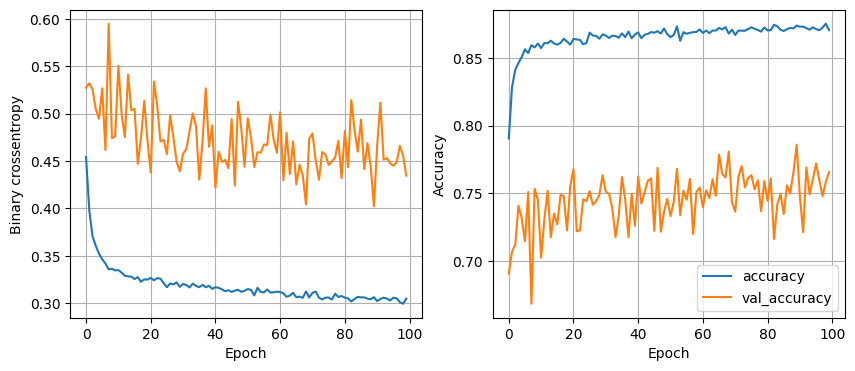

119/119 [==============================] - 0s 2ms/step - loss: 0.2966 - accuracy: 0.8704
32nodes ,dropout0.2,lr0.001,batch_size32


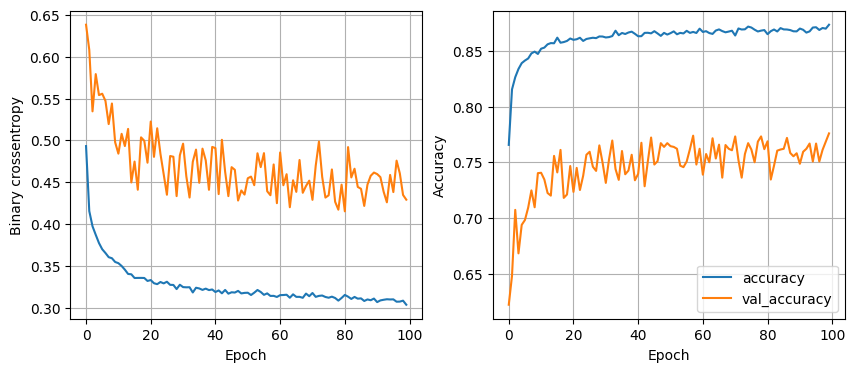

119/119 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.8762
32nodes ,dropout0.2,lr0.001,batch_size64


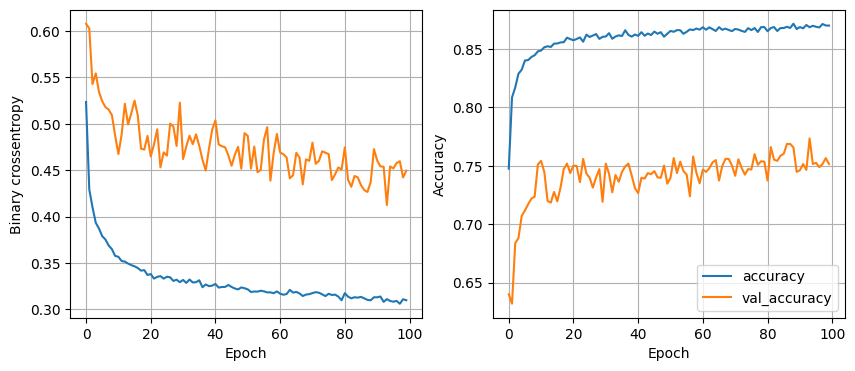

119/119 [==============================] - 0s 2ms/step - loss: 0.3014 - accuracy: 0.8746
32nodes ,dropout0.2,lr0.001,batch_size128


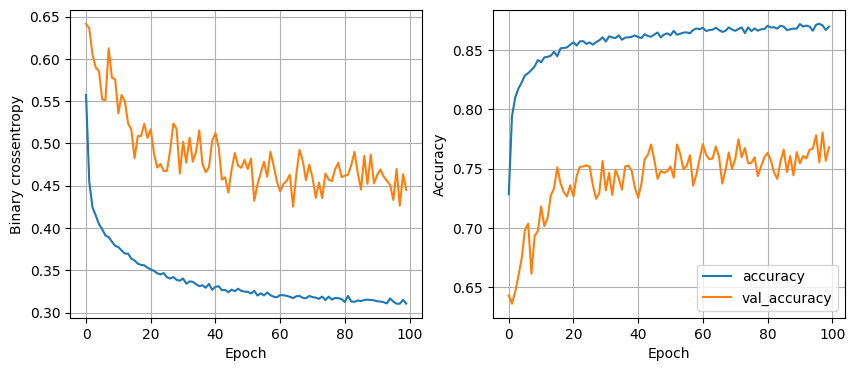

119/119 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8764
64nodes ,dropout0,lr0.01,batch_size32


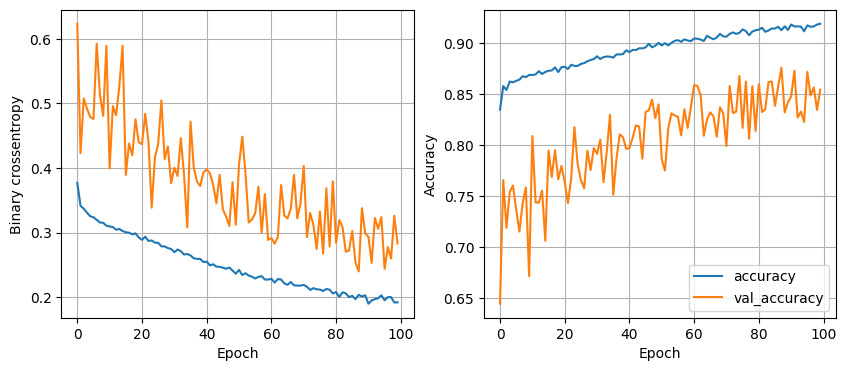

119/119 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.8628
64nodes ,dropout0,lr0.01,batch_size64


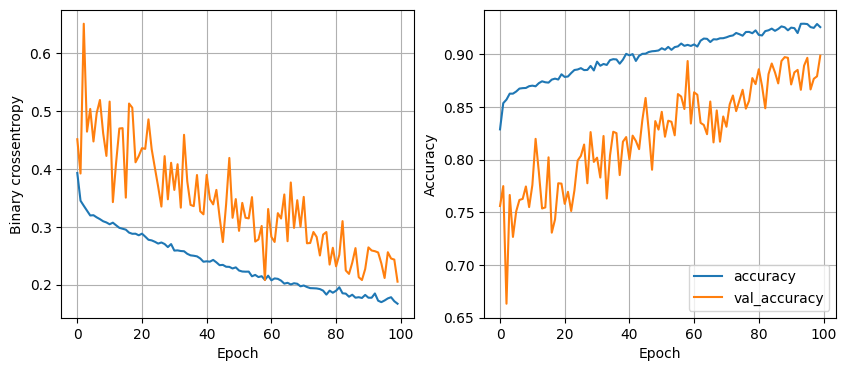

119/119 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.8530
64nodes ,dropout0,lr0.01,batch_size128


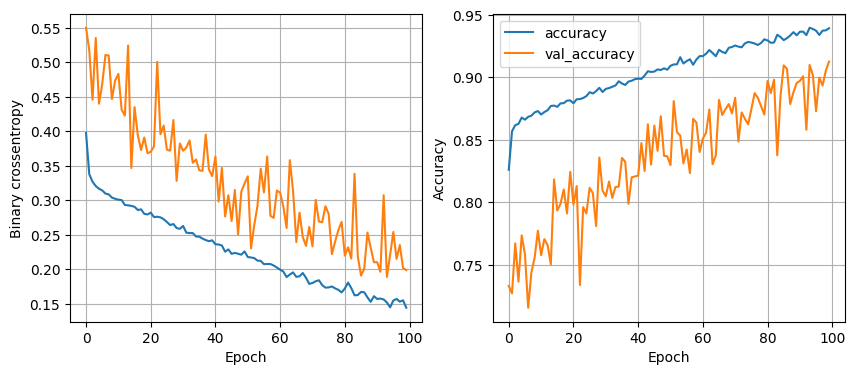

119/119 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.8507
64nodes ,dropout0,lr0.005,batch_size32


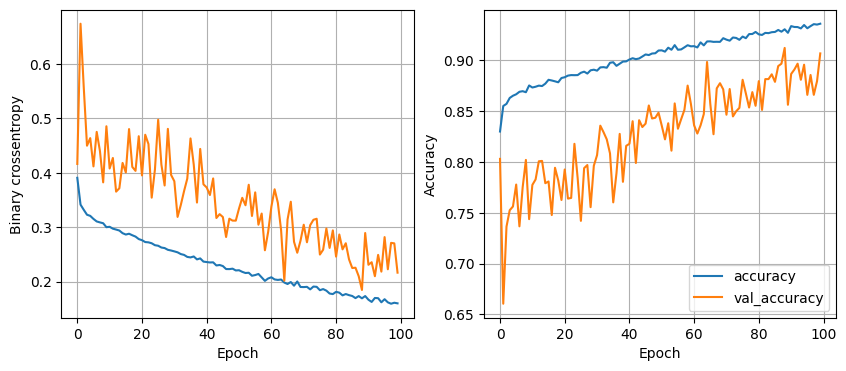

119/119 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.8570
64nodes ,dropout0,lr0.005,batch_size64


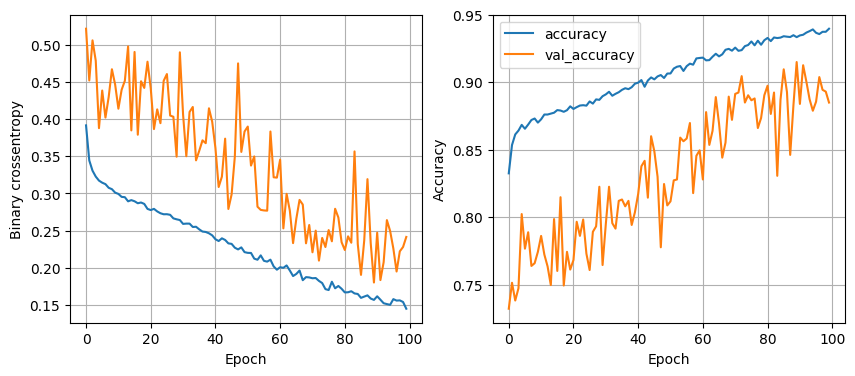

119/119 [==============================] - 0s 3ms/step - loss: 0.5515 - accuracy: 0.8588
64nodes ,dropout0,lr0.005,batch_size128


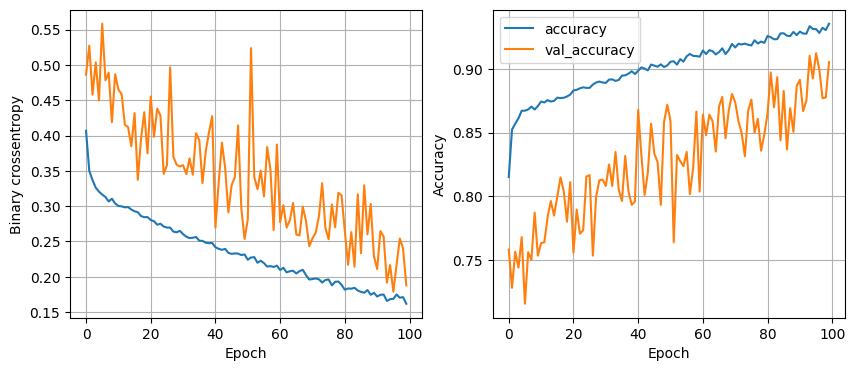

119/119 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.8512
64nodes ,dropout0,lr0.001,batch_size32


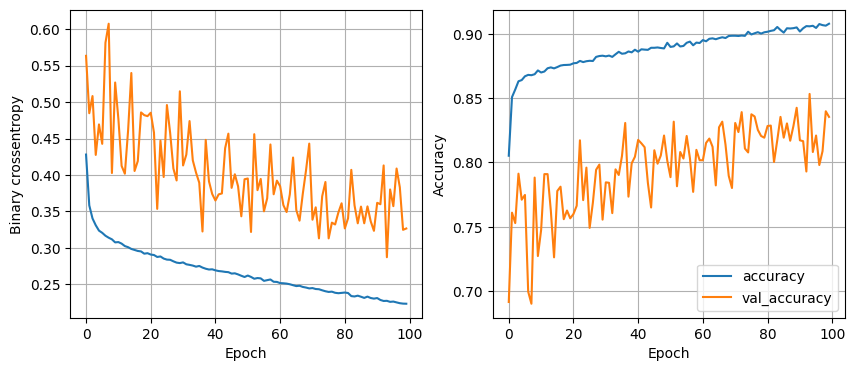

119/119 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8667
64nodes ,dropout0,lr0.001,batch_size64


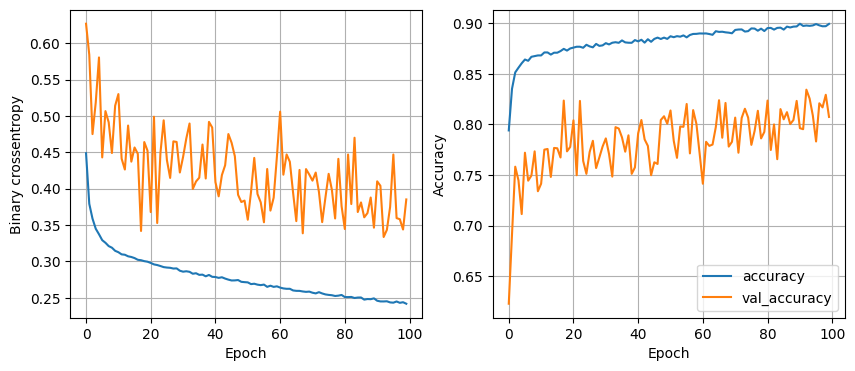

119/119 [==============================] - 0s 3ms/step - loss: 0.3232 - accuracy: 0.8720
64nodes ,dropout0,lr0.001,batch_size128


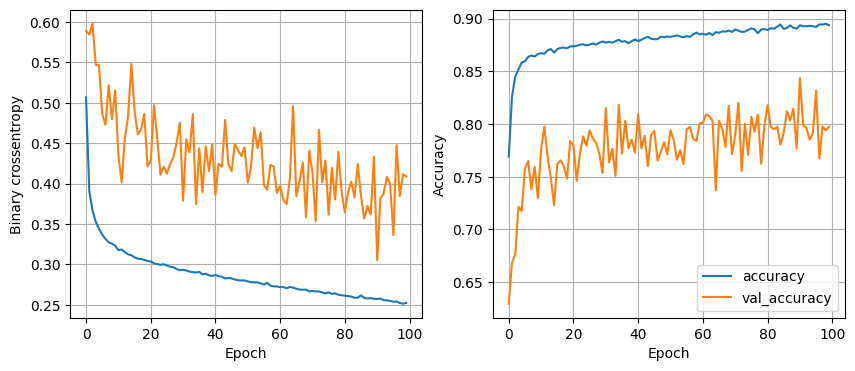

119/119 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8636
64nodes ,dropout0.2,lr0.01,batch_size32


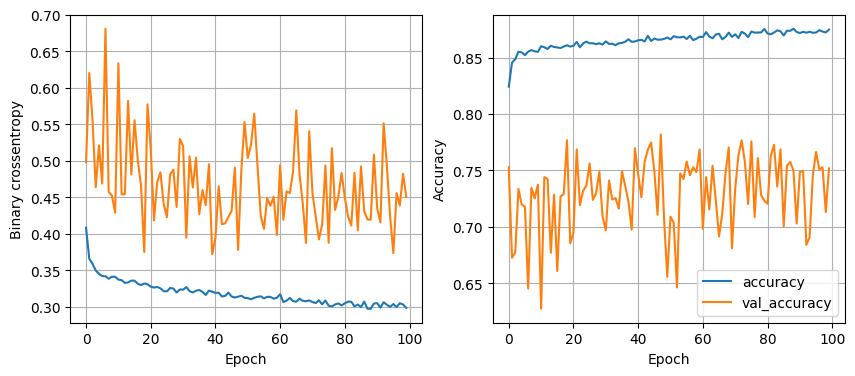

119/119 [==============================] - 0s 3ms/step - loss: 0.3056 - accuracy: 0.8749
64nodes ,dropout0.2,lr0.01,batch_size64


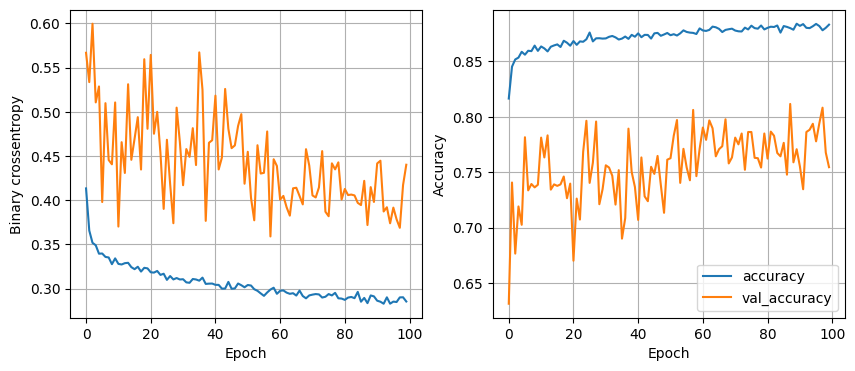

119/119 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8749
64nodes ,dropout0.2,lr0.01,batch_size128


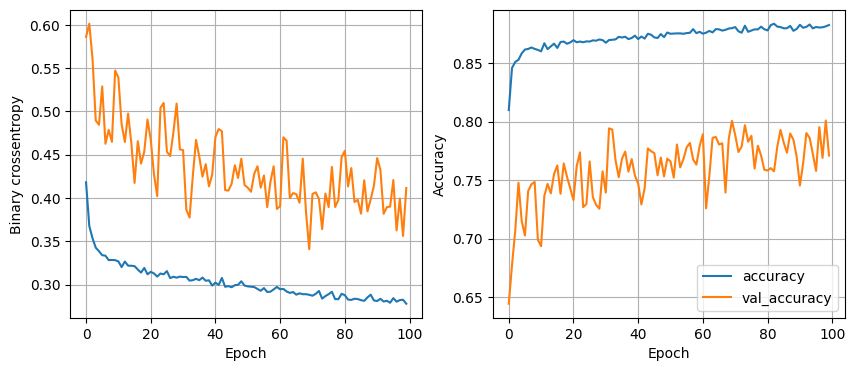

119/119 [==============================] - 0s 3ms/step - loss: 0.3038 - accuracy: 0.8751
64nodes ,dropout0.2,lr0.005,batch_size32


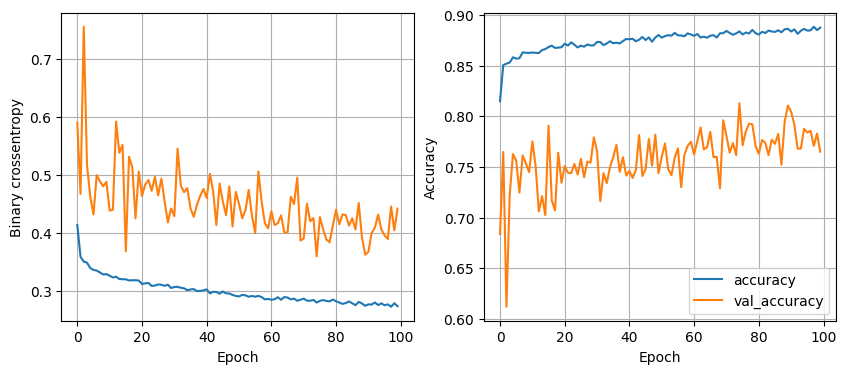

119/119 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.8730
64nodes ,dropout0.2,lr0.005,batch_size64


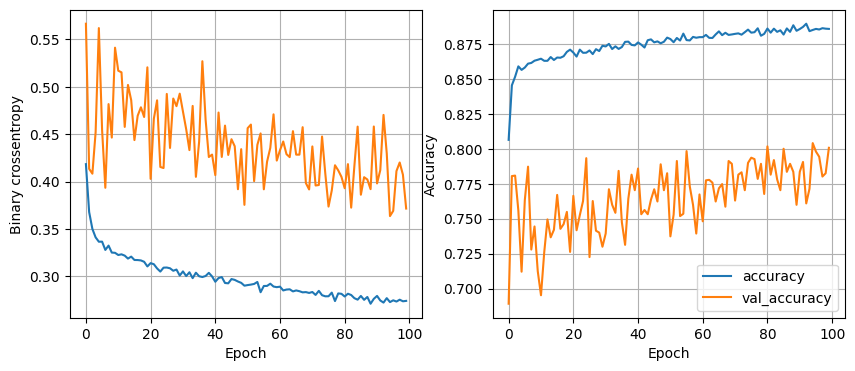

119/119 [==============================] - 0s 3ms/step - loss: 0.2957 - accuracy: 0.8817
64nodes ,dropout0.2,lr0.005,batch_size128


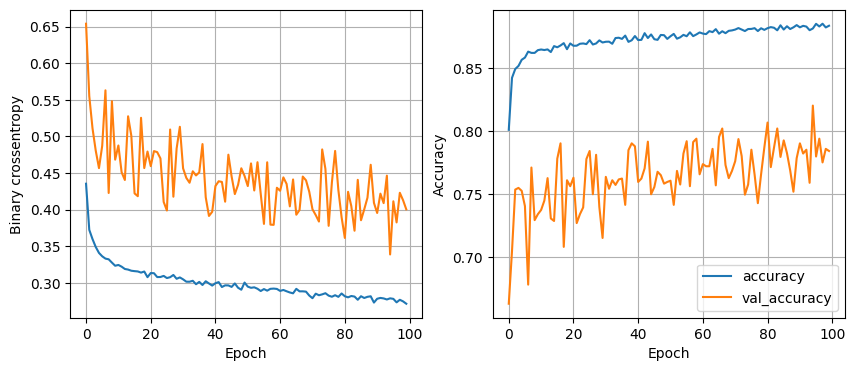

119/119 [==============================] - 0s 3ms/step - loss: 0.3054 - accuracy: 0.8762
64nodes ,dropout0.2,lr0.001,batch_size32


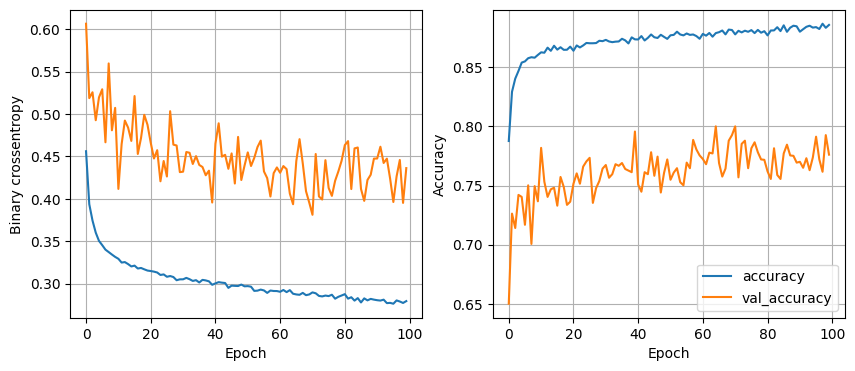

119/119 [==============================] - 0s 3ms/step - loss: 0.2981 - accuracy: 0.8785
64nodes ,dropout0.2,lr0.001,batch_size64


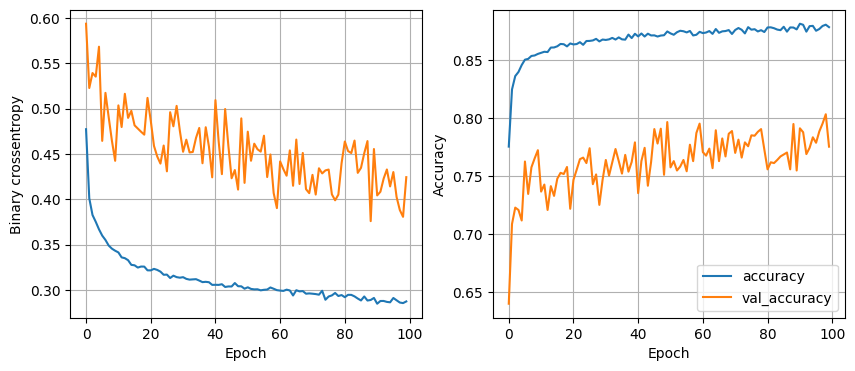

119/119 [==============================] - 0s 3ms/step - loss: 0.2963 - accuracy: 0.8772
64nodes ,dropout0.2,lr0.001,batch_size128


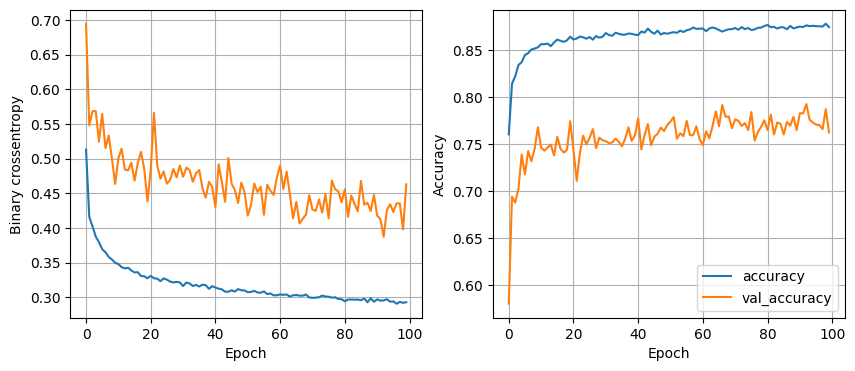

119/119 [==============================] - 0s 3ms/step - loss: 0.2979 - accuracy: 0.8743


In [ ]:
least_val_loss=float('inf')
least_loss_model=None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prob in[0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,128]:
        print(f"{num_nodes}nodes ,dropout{dropout_prob},lr{lr},batch_size{batch_size}")
        model,history=train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_history(history)
        val_loss=model.evaluate(X_valid,y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss=val_loss
          least_loss_model=model



In [ ]:
y_pred=least_loss_model.predixt(X_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)

NameError: ignored

In [ ]:
y_pred

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
plot_history(history)